In [ ]:
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('dataset.csv')
data

,text,text_en
0,sangat memuaskan service nya hanya kedepan nya...,its very satisfactory service nyaharus fore on...
1,saya pesan tiket hotel via traveloka mudah beg...,My message via traveloka easy hotel tickets as...
2,bagus tetap menjadi pilihan pertamapesan tiket...,Nice remains the choice pertamapesan but in ba...
3,buat saya aplikasi ticketing terbaik di indone...,for me the best ticketing application in Indon...
4,aplikasi nya mudah digunakan dari segi fitur s...,its application is easy to use is very clear i...
...,...,...
3958,maaf ini sampai sekarang belum ada respon sald...,This sorry until now there has been no respons...
3959,ganti no karna no kita sudah mati susah nya mi...,no change because we're dead no hard her for m...
3960,pelayanan cs kurang memuaskan,cs unsatisfactory service
3961,lupa pin kok tdk ada cs ny,forget kok pin cut no cs ny


In [ ]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['text_en'] = data['text_en'].apply(stemming_data)

In [ ]:
dataset = list(data['text_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0:
        total_positif += 1
        status.append('positive')
    elif analysis.sentiment.polarity == 0:
        total_netral += 1
        status.append('neutral')
    else:
        total_negatif += 1
        status.append('negative')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 2544
Netral = 555
Negatif = 864

Total Data : 3963


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data

,text,text_en,klasifikasi
0,sangat memuaskan service nya hanya kedepan nya...,its very satisfactory service nyaharus fore on...,positive
1,saya pesan tiket hotel via traveloka mudah beg...,my message via traveloka easy hotel tickets as...,positive
2,bagus tetap menjadi pilihan pertamapesan tiket...,nice remains the choice pertamapesan but in ba...,positive
3,buat saya aplikasi ticketing terbaik di indone...,for me the best ticketing application in indon...,positive
4,aplikasi nya mudah digunakan dari segi fitur s...,its application is easy to use is very clear i...,positive
...,...,...,...
3958,maaf ini sampai sekarang belum ada respon sald...,this sorry until now there has been no respons...,negative
3959,ganti no karna no kita sudah mati susah nya mi...,no change because we're dead no hard her for m...,positive
3960,pelayanan cs kurang memuaskan,cs unsatisfactory servic,neutral
3961,lupa pin kok tdk ada cs ny,forget kok pin cut no cs ni,neutral


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

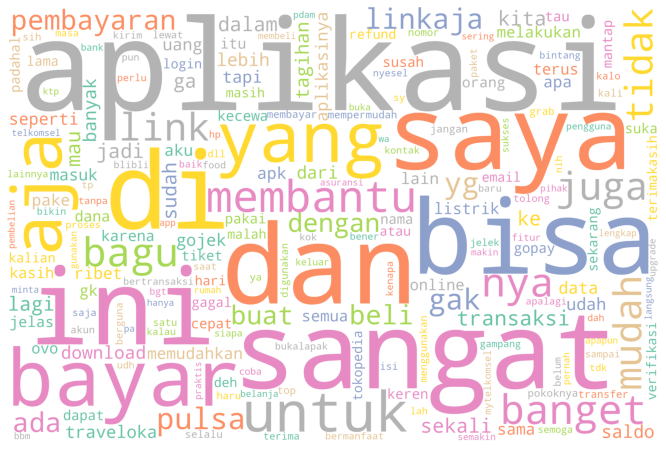

In [ ]:
all_words = ' '.join([tweets for tweets in data['text']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

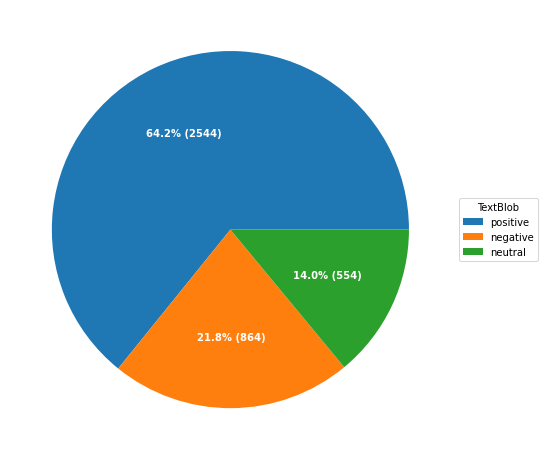

In [ ]:
label = ['positive', 'negative', 'neutral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "TextBlob")

**NAIVE BAYES**



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset = data.drop(['text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = [] 
set_netral = []

for n in dataset:
    if(n[1] == 'positive'):
      set_positif.append(n)
    elif(n[1] == 'negative'):
      set_negatif.append(n)
    else: 
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.8178147867776937


In [ ]:
dataset = list(data['text_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'positive':
        total_positif += 1
    elif analysis.classify() == 'neutral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 2565
Netral = 522
Negatif = 876

Total Data : 3963


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

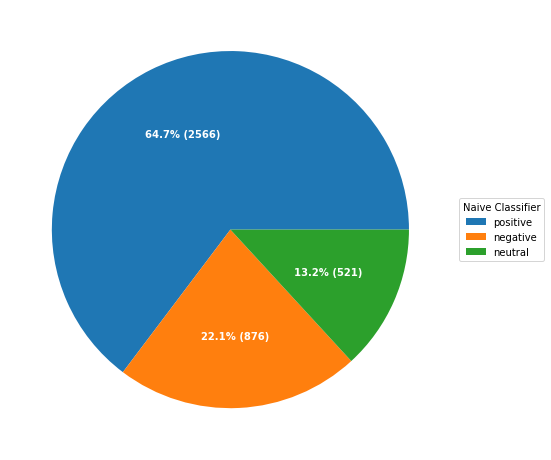

In [ ]:
label = ['positive', 'negative', 'neutral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Naive Classifier")

In [ ]:
status

,klasifikasi_bayes
0,negative
1,positive
2,negative
3,positive
4,positive
...,...
3958,negative
3959,negative
3960,neutral
3961,neutral


In [ ]:
status.to_excel('naivebayes.xlsx',index=False)

In [ ]:
data = pd.read_csv('sample.csv')
data

,text,sentiment
0,sangat memuaskan service nya hanya kedepan nya...,negative
1,saya pesan tiket hotel via traveloka mudah beg...,positive
2,bagus tetap menjadi pilihan pertamapesan tiket...,negative
3,buat saya aplikasi ticketing terbaik di indone...,positive
4,aplikasi nya mudah digunakan dari segi fitur s...,positive
...,...,...
3958,maaf ini sampai sekarang belum ada respon sald...,negative
3959,ganti no karna no kita sudah mati susah nya mi...,negative
3960,pelayanan cs kurang memuaskan,neutral
3961,lupa pin kok tdk ada cs ny,neutral
